In [20]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

green_background = cv2.imread("/content/GreenBackground.png")
new_background = cv2.imread("/content/NewBackground.jpg")
object_img = cv2.imread("/content/Object.png")

img_size = (678, 381)

green_background = cv2.resize(green_background, img_size)
new_background = cv2.resize(new_background, img_size)
object_img = cv2.resize(object_img, img_size)

#cv2_imshow(green_background)
#cv2_imshow(new_background)
#cv2_imshow(object_img)

print(green_background.shape)
print(new_background.shape)
print(object_img.shape)

(381, 678, 3)
(381, 678, 3)
(381, 678, 3)


(381, 678)


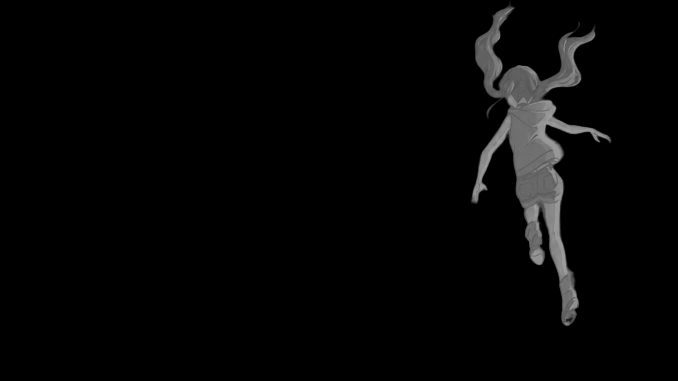

In [24]:
def compute_different(green_background, object_img):
    object_different = cv2.absdiff(green_background, object_img)
    different_single = np.sum(object_different, axis=2)/3
    different_single = different_single.astype(np.uint8)
    return different_single

different_single = compute_different(green_background, object_img)
print(different_single.shape)
cv2_imshow(different_single)

(381, 678, 3)


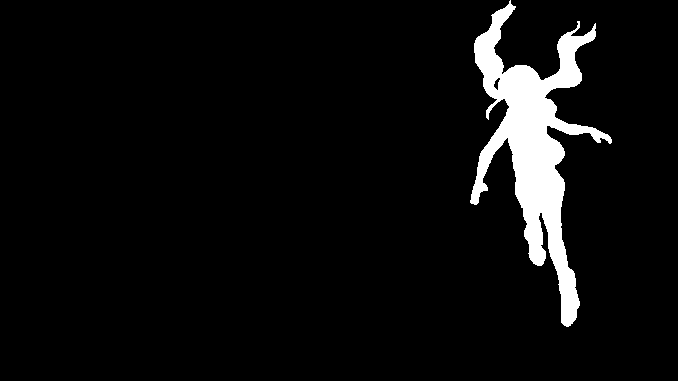

In [26]:
def compute_binary_mask(difference_single_channel):
    different_binary = np.where(difference_single_channel > 10, 255, 0)
    different_binary = np.stack((different_binary,)*3, axis=-1)
    return different_binary

binary_mask = compute_binary_mask(different_single)
print(binary_mask.shape)
cv2_imshow(binary_mask)

(381, 678, 3)


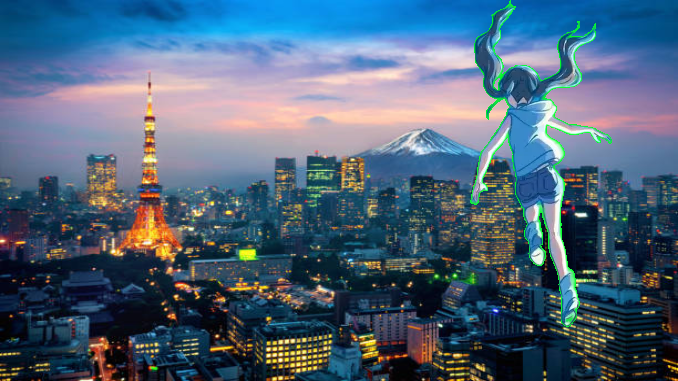

In [28]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_different(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask == 255, ob_image, bg2_image)
    return output

output = replace_background(green_background, new_background, object_img)
print(output.shape)
cv2_imshow(output)